In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv("../../data/ccc_2005_beta.csv")

In [3]:
data['Data'] = pd.to_datetime(data['Data'])
data.dropna(inplace=True)

In [4]:
X = np.arange(len(data)).reshape(-1, 1)
y = data['Beta']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [6]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Wykonanie predykcji
predictions_rf = model_rf.predict(X_test)

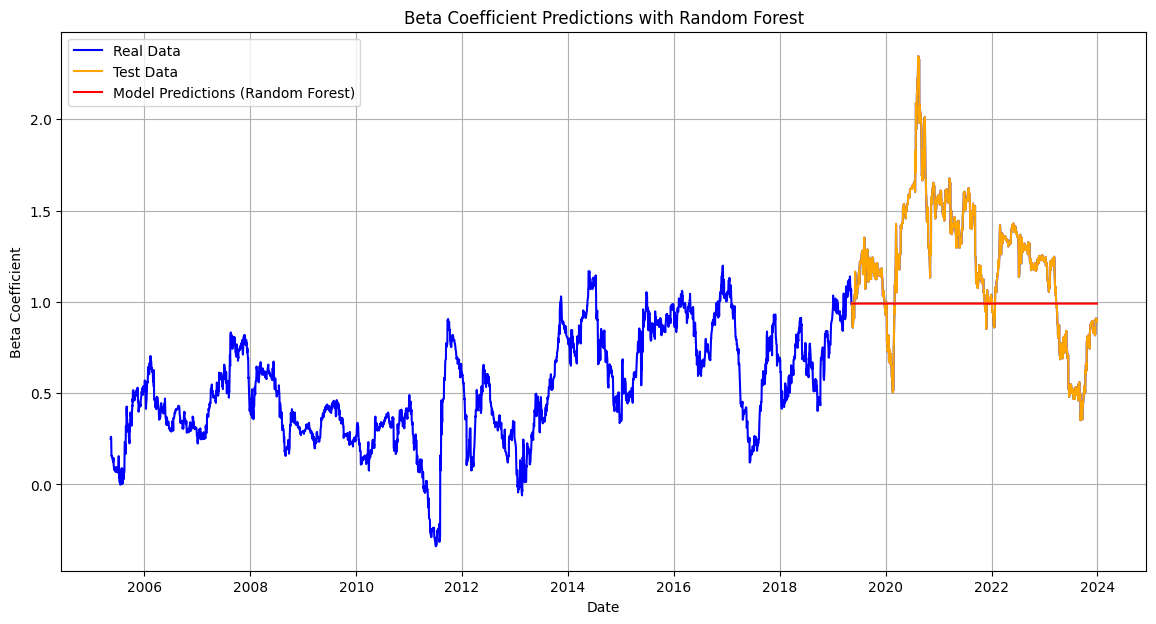

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(data['Data'], y, label='Real Data', color='blue', linewidth=1.5)
plt.plot(data['Data'].iloc[X_test.flatten()], y_test, label='Test Data', color='orange', linewidth=1.5)
plt.plot(data['Data'].iloc[X_test.flatten()], predictions_rf, label='Model Predictions (Random Forest)', color='red', linewidth=1.5)
plt.title('Beta Coefficient Predictions with Random Forest')
plt.xlabel('Date')
plt.ylabel('Beta Coefficient')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
mse_rf = mean_squared_error(y_test, predictions_rf)
mae_rf = mean_absolute_error(y_test, predictions_rf)
rmse_rf = mean_squared_error(y_test, predictions_rf, squared=False)
r2_rf = r2_score(y_test, predictions_rf)

print("Mean Absolute Error (MAE) for Random Forest:", mae_rf)
print("Squared Mean Absolute Error (RMSE) for Random Forest:", rmse_rf)
print("R-squared (R2) for Random Forest:", r2_rf)

Mean Absolute Error (MAE) for Random Forest: 0.3436725684334741
Squared Mean Absolute Error (RMSE) for Random Forest: 0.41160208349903826
R-squared (R2) for Random Forest: -0.36547957013228305
